# Question 2]Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv("E:\data scines\Assignment-Data sciencs\Multiple  Linear Regression\\Toyoto_Corrola (1).csv")
print(df)

        Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  Quarterly_Tax  \
0            23  46986   90      3          4      5    

In [3]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight,Quarterly_Tax,cc
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165,210,2000
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165,210,2000
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165,210,2000
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165,210,2000
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170,210,2000


In [4]:
df.shape

(1436, 12)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1436 non-null   int64 
 1   Model          1436 non-null   object
 2   Price          1436 non-null   int64 
 3   Age_08_04      1436 non-null   int64 
 4   KM             1436 non-null   int64 
 5   HP             1436 non-null   int64 
 6   Doors          1436 non-null   int64 
 7   Cylinders      1436 non-null   int64 
 8   Gears          1436 non-null   int64 
 9   Weight         1436 non-null   int64 
 10  Quarterly_Tax  1436 non-null   int64 
 11  cc             1436 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 134.8+ KB


In [6]:
data_toyta=df.drop(['Id','Model'],axis=1)

In [7]:
data_toyta

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight,Quarterly_Tax,cc
0,13500,23,46986,90,3,4,5,1165,210,2000
1,13750,23,72937,90,3,4,5,1165,210,2000
2,13950,24,41711,90,3,4,5,1165,210,2000
3,14950,26,48000,90,3,4,5,1165,210,2000
4,13750,30,38500,90,3,4,5,1170,210,2000
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025,69,1300
1432,10845,72,19000,86,3,4,5,1015,69,1300
1433,8500,71,17016,86,3,4,5,1015,69,1300
1434,7250,70,16916,86,3,4,5,1015,69,1300


In [8]:
df1=data_toyta.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
0,13500,23,46986,90,3,4,5,1165,210,2000
1,13750,23,72937,90,3,4,5,1165,210,2000
2,13950,24,41711,90,3,4,5,1165,210,2000
3,14950,26,48000,90,3,4,5,1165,210,2000
4,13750,30,38500,90,3,4,5,1170,210,2000
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025,69,1300
1432,10845,72,19000,86,3,4,5,1015,69,1300
1433,8500,71,17016,86,3,4,5,1015,69,1300
1434,7250,70,16916,86,3,4,5,1015,69,1300


In [9]:
df1.isnull().sum()

Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
QT           0
CC           0
dtype: int64

In [10]:
df1[df1.duplicated()]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
113,24950,8,13253,116,5,4,5,1320,234,2000


In [11]:
df2=df1.drop_duplicates().reset_index(drop=True)
df2

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
0,13500,23,46986,90,3,4,5,1165,210,2000
1,13750,23,72937,90,3,4,5,1165,210,2000
2,13950,24,41711,90,3,4,5,1165,210,2000
3,14950,26,48000,90,3,4,5,1165,210,2000
4,13750,30,38500,90,3,4,5,1170,210,2000
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,4,5,1025,69,1300
1431,10845,72,19000,86,3,4,5,1015,69,1300
1432,8500,71,17016,86,3,4,5,1015,69,1300
1433,7250,70,16916,86,3,4,5,1015,69,1300


In [12]:
df2.describe()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,4.032753,4.0,5.026481,1072.287108,87.020209,1576.560976
std,3608.732978,18.563312,37491.094553,14.981408,0.952667,0.0,0.188575,52.251882,40.959588,424.387533
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.000000,19.000000,1300.000000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.000000,69.000000,1400.000000
50%,9900.000000,61.000000,63451.000000,110.000000,4.000000,4.0,5.000000,1070.000000,85.000000,1600.000000
75%,11950.000000,70.000000,87041.500000,110.000000,5.000000,4.0,5.000000,1085.000000,85.000000,1600.000000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.000000,283.000000,16000.000000


# Correlation Analysis

In [13]:
df2.corr()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,NaN,0.063831,0.575869,0.211508,0.124375
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,NaN,-0.005629,-0.466484,-0.193319,-0.096549
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,NaN,0.014890,-0.023969,0.283312,0.103822
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,NaN,0.209642,0.087143,-0.302287,0.035207
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,NaN,-0.160101,0.301734,0.107353,0.079254
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,NaN,1.000000,0.021238,-0.005125,0.014732
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,NaN,0.021238,1.000000,0.621988,0.335077
QT,0.211508,-0.193319,0.283312,-0.302287,0.107353,NaN,-0.005125,0.621988,1.000000,0.305982
CC,0.124375,-0.096549,0.103822,0.035207,0.079254,NaN,0.014732,0.335077,0.305982,1.000000


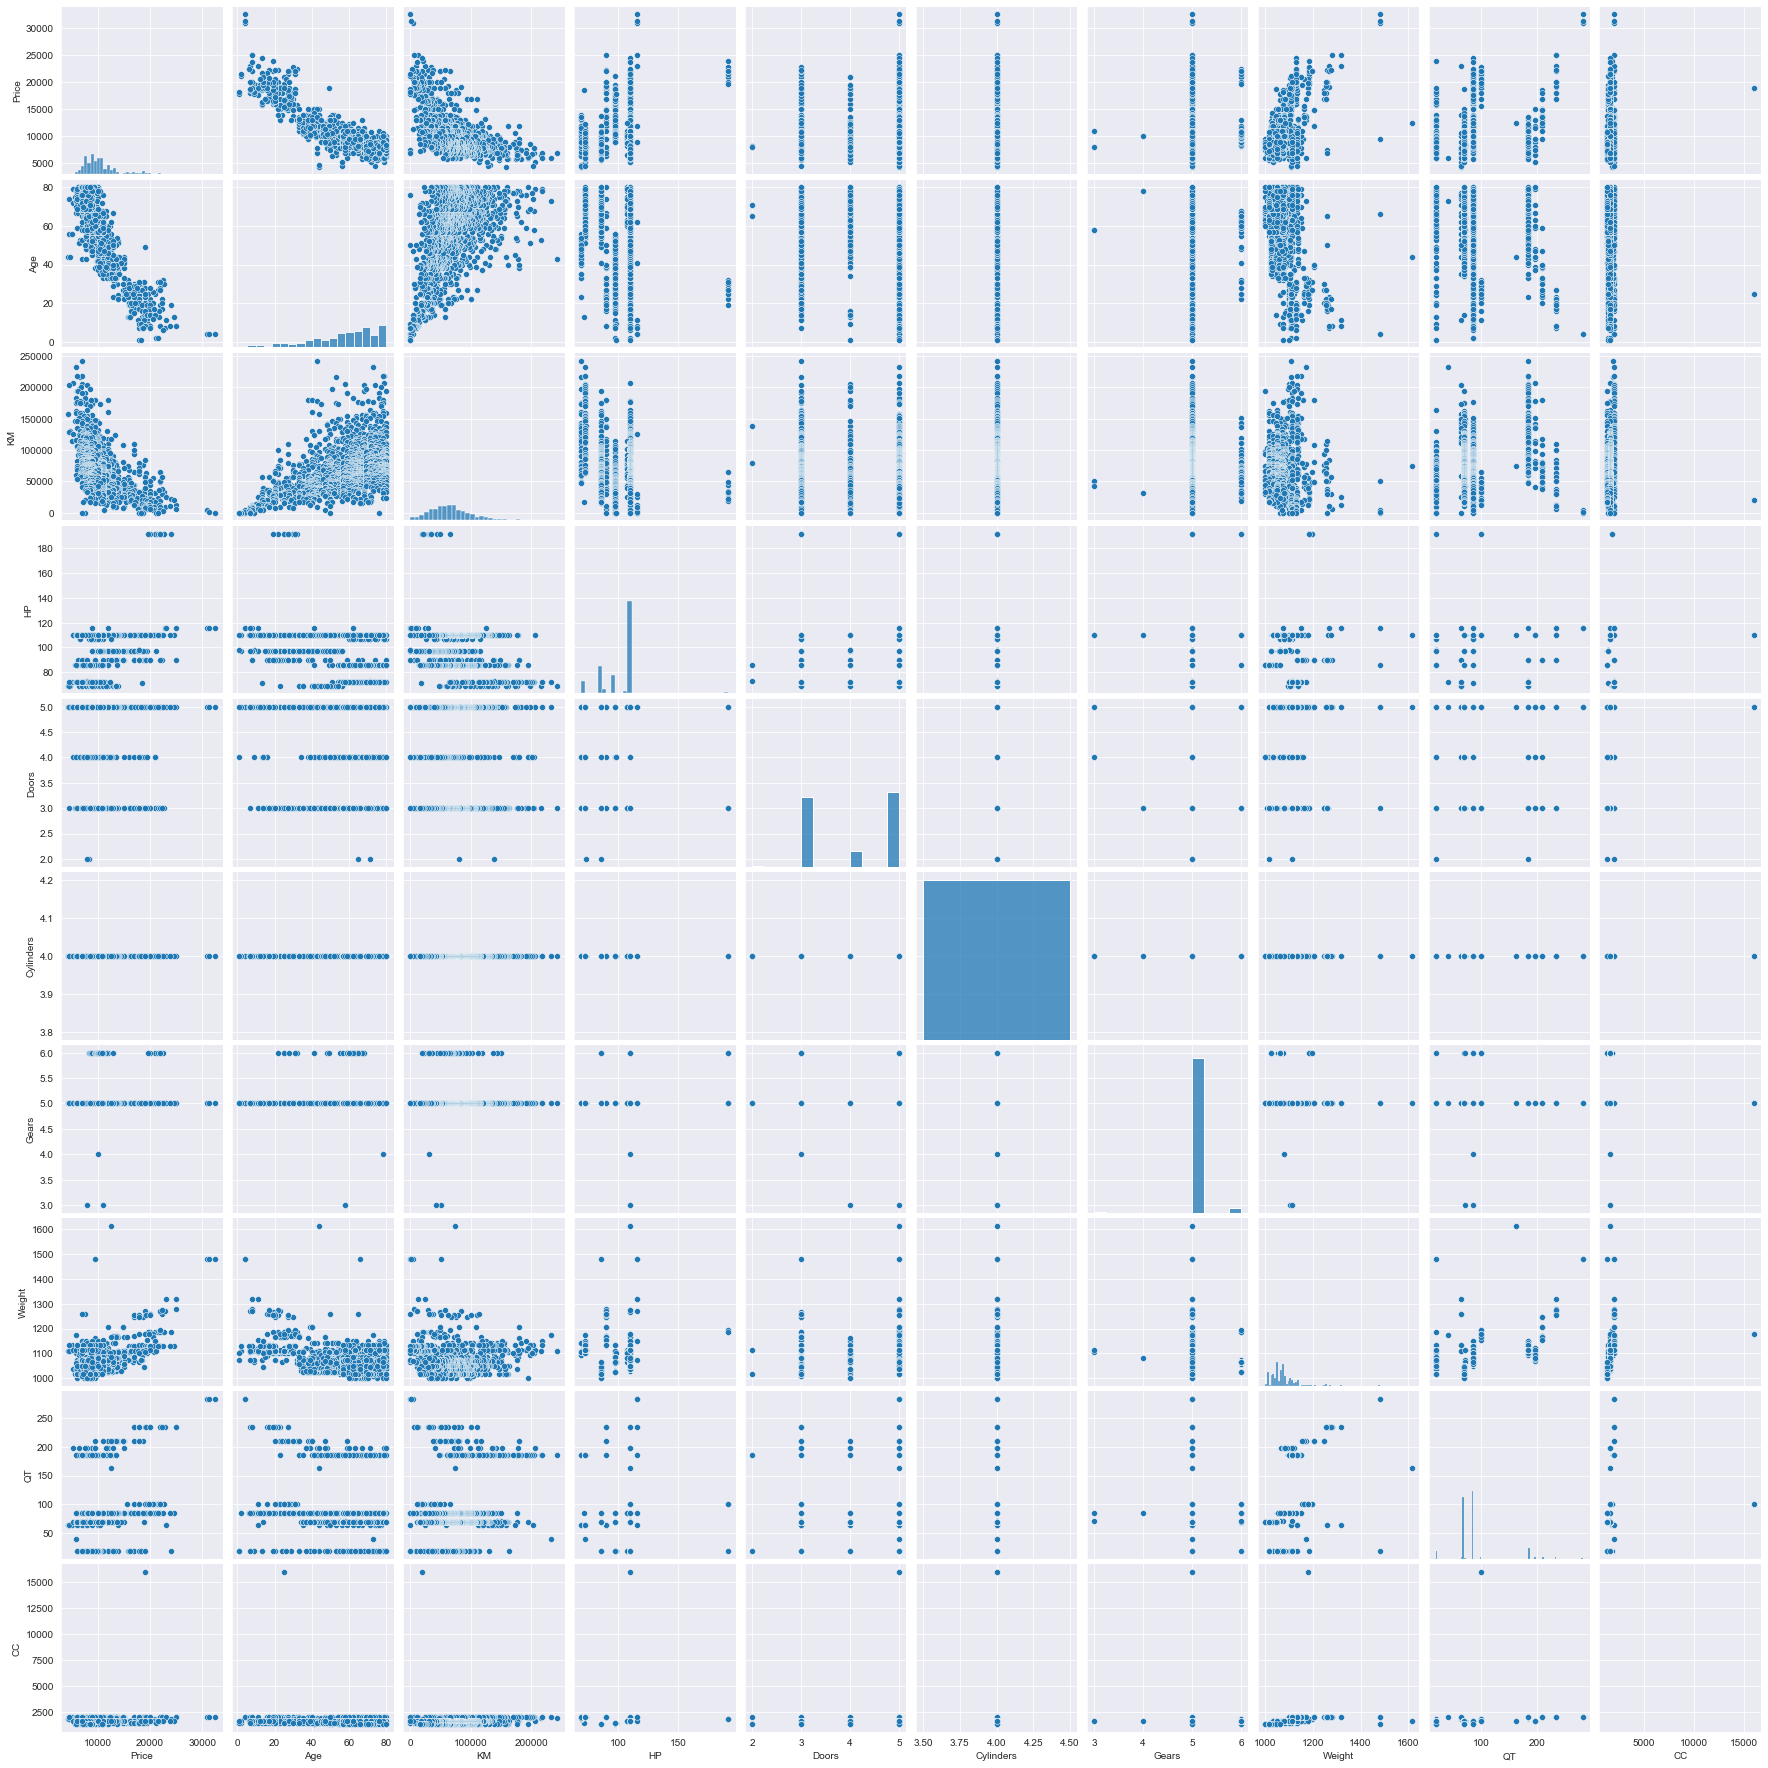

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

# Model Building

In [15]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()

# Model Testing

In [16]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [17]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [18]:
# Finding rsquared values
model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [19]:
slr_c=smf.ols('Price~CC',data=df2).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [20]:
slr_d=smf.ols('Price~Doors',data=df2).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [21]:
mlr_cd=smf.ols('Price~CC+Doors',data=df2).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

1. Collinearity Check

 Calculate VIF = 1/(1-Rsquare) for all independent variables

In [22]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)


In [23]:
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [24]:
rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [25]:
rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df2).fit().rsquared
vif_CC=1/(1-rsq_CC)


In [26]:
rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df2).fit().rsquared
vif_DR=1/(1-rsq_DR)

In [27]:
rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df2).fit().rsquared
vif_GR=1/(1-rsq_GR)

In [28]:
rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df2).fit().rsquared
vif_QT=1/(1-rsq_QT)

In [29]:
rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df2).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [30]:
# Putting the values in Dataframe format

In [31]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [32]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

 2) Residual Analysis

 Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

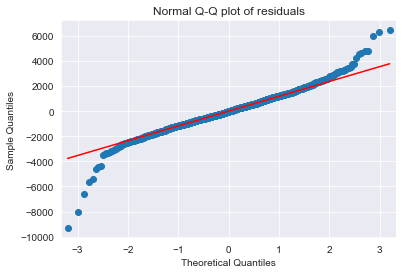

In [33]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [35]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [36]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

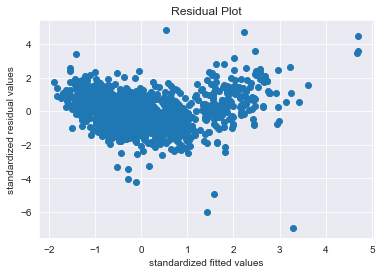

In [37]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [38]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


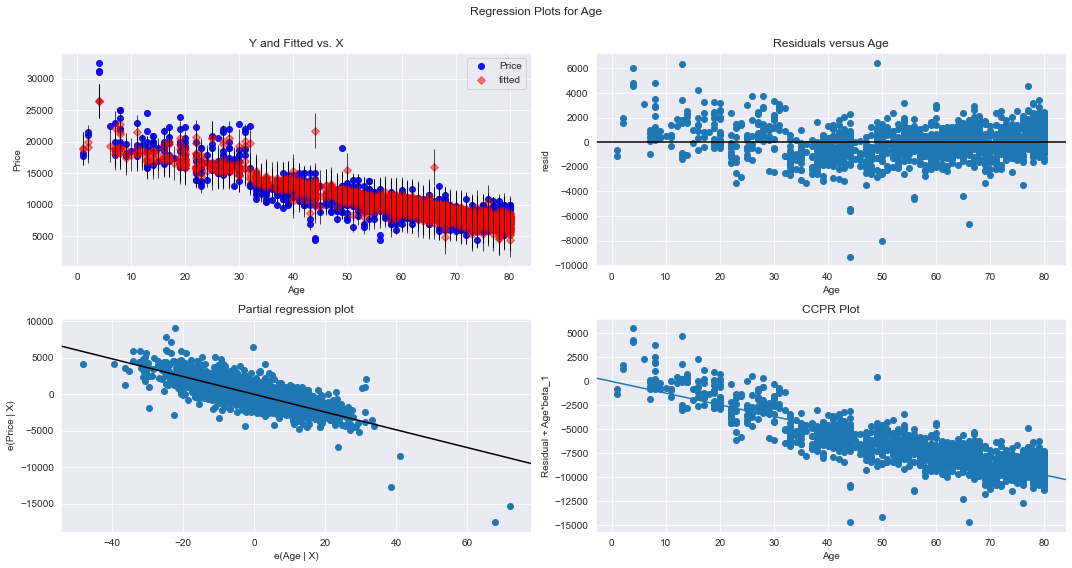

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


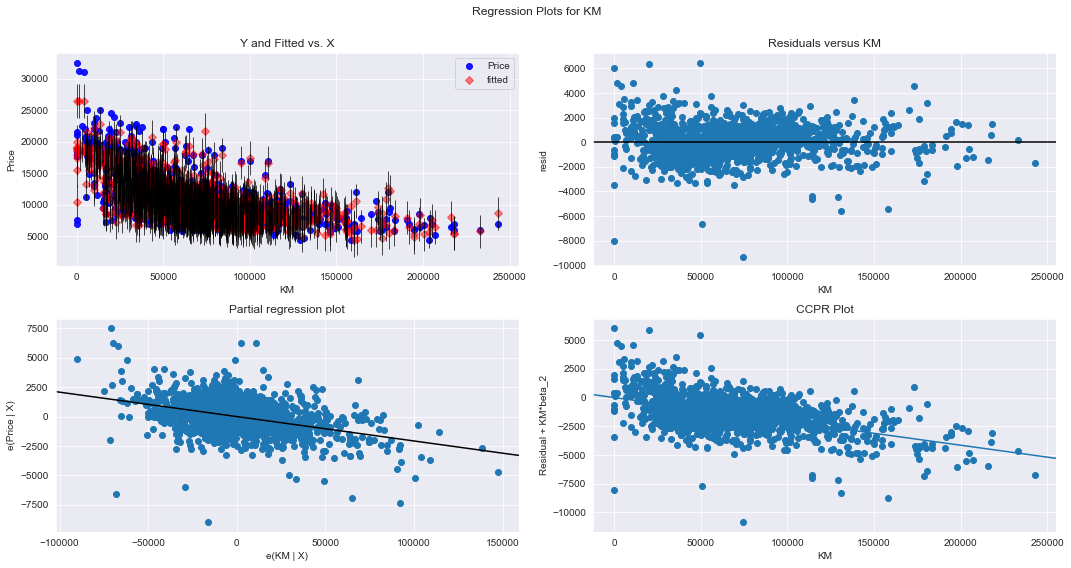

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


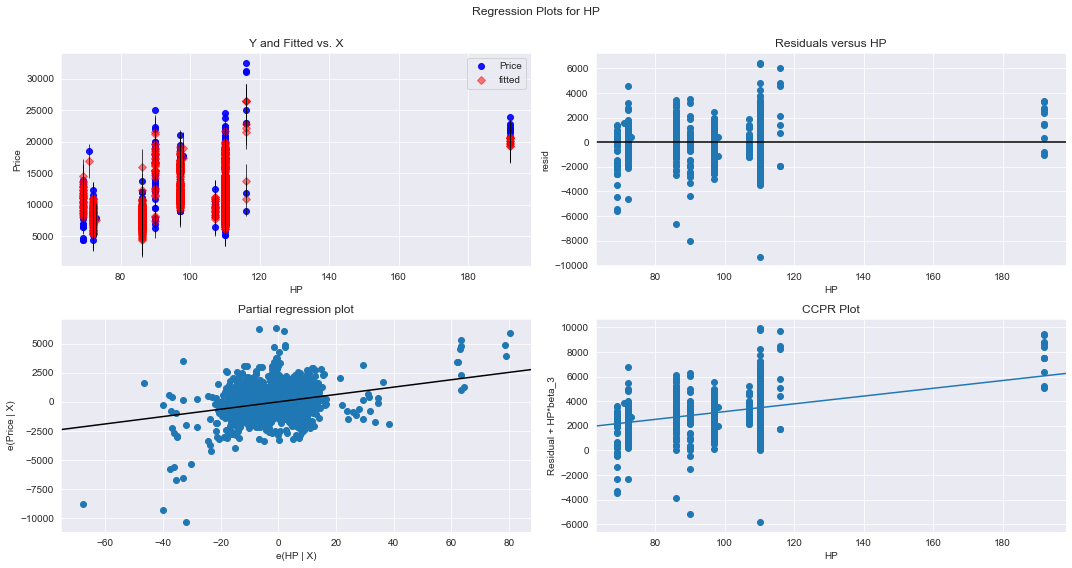

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


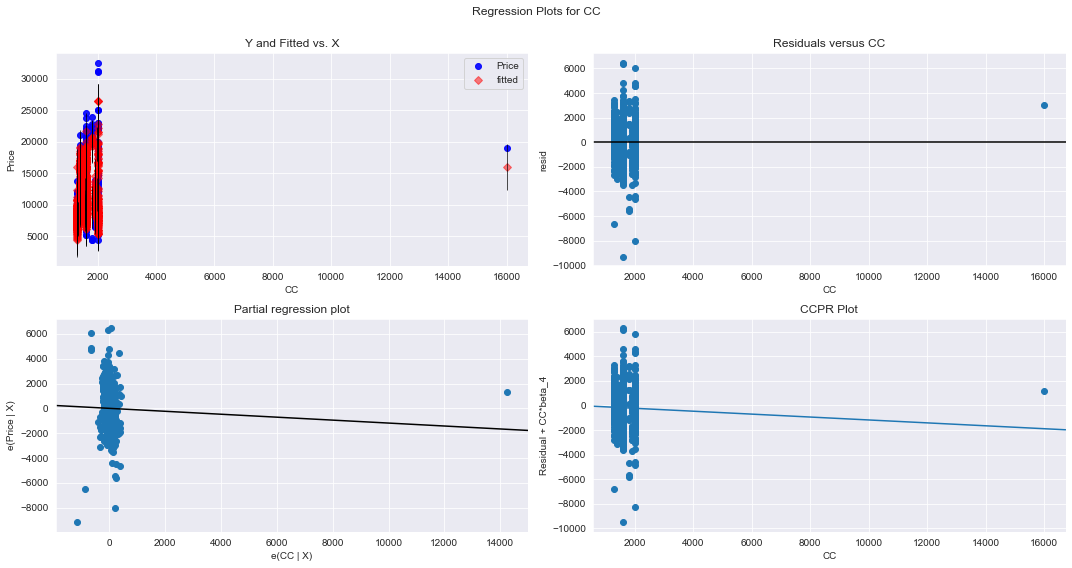

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


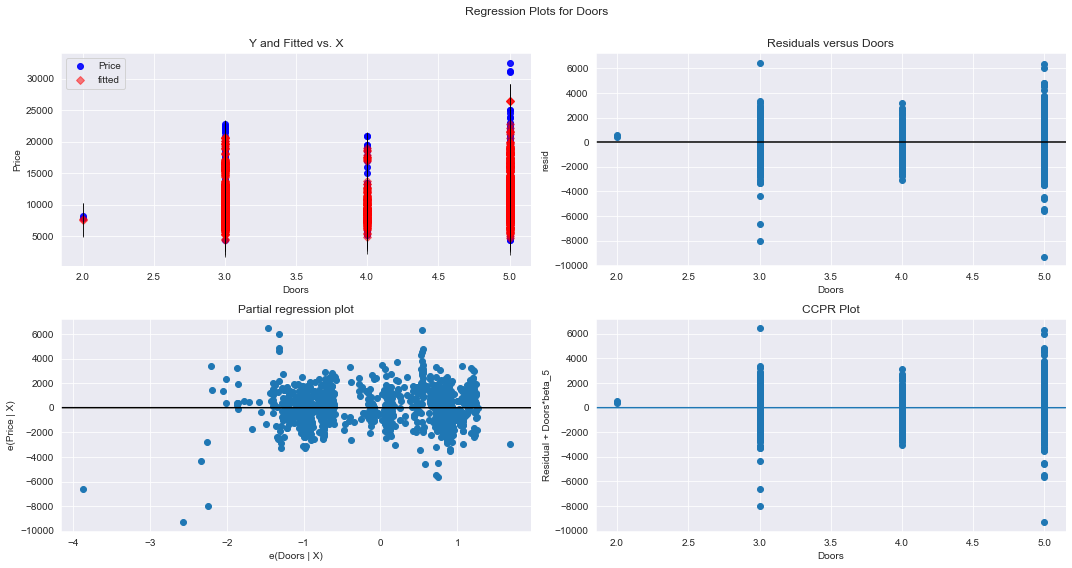

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


eval_env: 1


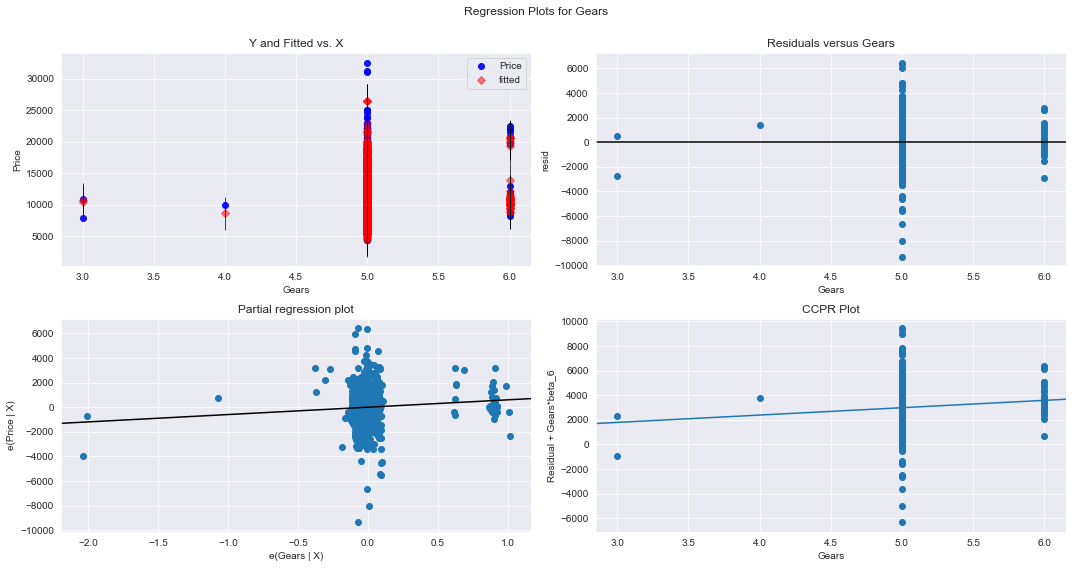

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


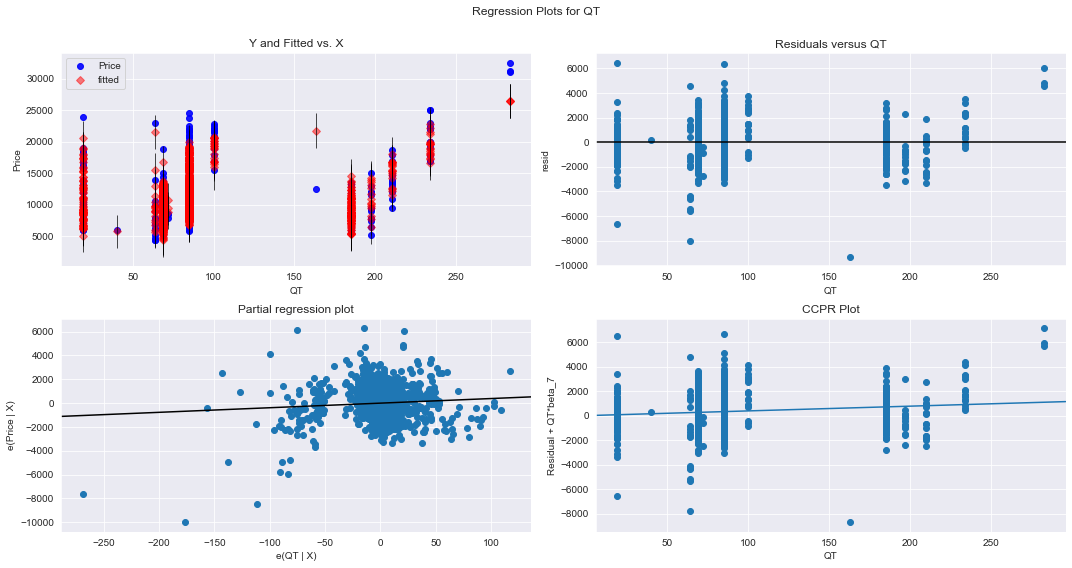

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


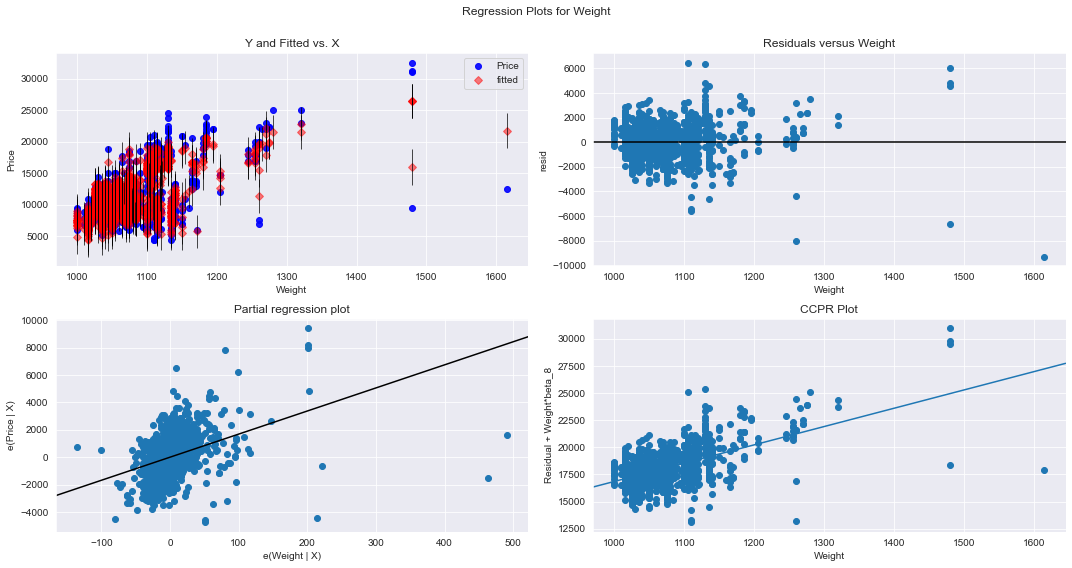

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

 1. Cook's Distance

In [47]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

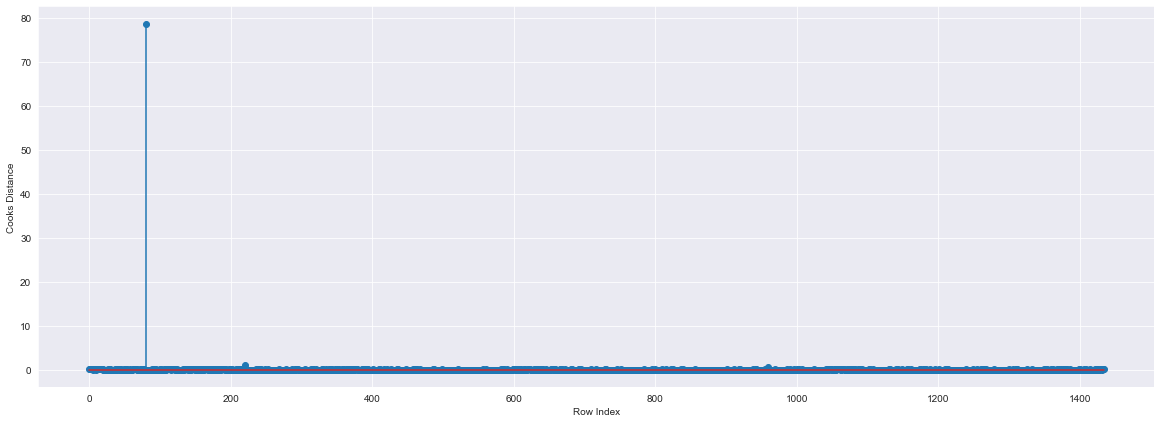

In [48]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

In [50]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.022996515679442508

In [51]:
df2[df2.index.isin([80])] 

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
80,18950,25,20019,110,5,4,5,1180,100,16000


# Improving the Model

In [52]:
# Creating a copy of data so that original dataset is not affected
toyo_new=df2.copy()
toyo_new

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
0,13500,23,46986,90,3,4,5,1165,210,2000
1,13750,23,72937,90,3,4,5,1165,210,2000
2,13950,24,41711,90,3,4,5,1165,210,2000
3,14950,26,48000,90,3,4,5,1165,210,2000
4,13750,30,38500,90,3,4,5,1170,210,2000
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,4,5,1025,69,1300
1431,10845,72,19000,86,3,4,5,1015,69,1300
1432,8500,71,17016,86,3,4,5,1015,69,1300
1433,7250,70,16916,86,3,4,5,1015,69,1300


In [53]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
0,13500,23,46986,90,3,4,5,1165,210,2000
1,13750,23,72937,90,3,4,5,1165,210,2000
2,13950,24,41711,90,3,4,5,1165,210,2000
3,14950,26,48000,90,3,4,5,1165,210,2000
4,13750,30,38500,90,3,4,5,1170,210,2000
...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,3,4,5,1025,69,1300
1430,10845,72,19000,86,3,4,5,1015,69,1300
1431,8500,71,17016,86,3,4,5,1015,69,1300
1432,7250,70,16916,86,3,4,5,1015,69,1300


Model Deletion Diagnostics and Final Model

In [54]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [55]:
final_model.rsquared # Model Accuracy is increased to 90.02%

0.9003762532318559

In [56]:
toyo5

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight,QT,CC
0,13750,23,72937,90,3,4,5,1165,210,2000
1,14950,26,48000,90,3,4,5,1165,210,2000
2,13750,30,38500,90,3,4,5,1170,210,2000
3,12950,32,61000,90,3,4,5,1170,210,2000
4,16900,27,94612,90,3,4,5,1245,210,2000
...,...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,3,4,5,1015,69,1300
1326,7500,69,20544,86,3,4,5,1025,69,1300
1327,10845,72,19000,86,3,4,5,1015,69,1300
1328,8500,71,17016,86,3,4,5,1015,69,1300


# Model Predictions

In [57]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [58]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [59]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64